# Libraries

In [1]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Prepare Data

In [2]:
def prepare_prophet_data(stock_data: pd.DataFrame) -> pd.DataFrame:
    prophet_data = stock_data[['Close']].reset_index()
    prophet_data.columns = prophet_data.columns.get_level_values(0)
    prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
    prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])
    prophet_data = prophet_data.dropna(subset=['y'])
    prophet_data['y'] = prophet_data['y'].astype(float)
    return prophet_data

# Stock Data

In [3]:
def fetch_stock_data(stock_symbol: str) -> pd.DataFrame:
    stock_data = yf.download(stock_symbol, start="2010-01-01", end=datetime.today().strftime('%Y-%m-%d'))
    return stock_data

# Train Model

In [4]:
def train_prophet_model(prophet_data: pd.DataFrame) -> Prophet:
    model = Prophet()
    model.fit(prophet_data)
    return model

# Forecast

In [5]:
def make_forecast(model: Prophet, periods: int = 365) -> pd.DataFrame:
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    return forecast

# Plot

In [6]:
def plot_stock_forecast(stock_data: pd.DataFrame, forecast: pd.DataFrame, stock_symbol: str, model: Prophet):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Actual Stock Price', color='blue')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Stock Price', color='red', linestyle='--')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
    plt.title(f'{stock_symbol} Stock Price: Actual vs. Predicted (Next 1 Year)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    model.plot_components(forecast)
    plt.show()

# Metric

In [7]:
def calculate_mae(stock_data: pd.DataFrame, forecast: pd.DataFrame) -> float:
    actual_prices = stock_data['Close'].tail(365)
    predicted_prices = forecast['yhat'].tail(365)
    mae = mean_absolute_error(actual_prices, predicted_prices)
    return mae

# Main Function

In [8]:
def predict_stock_price():
    stock_symbol = input("Enter the stock symbol (e.g., AAPL, TSLA, etc.): ")
    stock_data = fetch_stock_data(stock_symbol)
    prophet_data = prepare_prophet_data(stock_data)
    model = train_prophet_model(prophet_data)
    forecast = make_forecast(model)
    plot_stock_forecast(stock_data, forecast, stock_symbol, model)
    mae = calculate_mae(stock_data, forecast)
    print(f"\nMean Absolute Error (MAE) for prediction: {mae:.2f}")
    print(f"Predicted closing prices for the next 365 days (2025):")
    print(forecast[['ds', 'yhat']].tail(365).rename(columns={'ds': 'Date', 'yhat': 'Predicted Close Price'}))
    print("\nPredicted stock data (with bounds):")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365).rename(columns={'ds': 'Date', 'yhat': 'Predicted Close Price'}))

Enter the stock symbol (e.g., AAPL, TSLA, etc.): aapl


[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9adi82zl/_8ukb594.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9adi82zl/lzbf6ug_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17674', 'data', 'file=/tmp/tmp9adi82zl/_8ukb594.json', 'init=/tmp/tmp9adi82zl/lzbf6ug_.json', 'output', 'file=/tmp/tmp9adi82zl/prophet_modelqvv3i_zb/prophet_model-20250120040753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:07:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


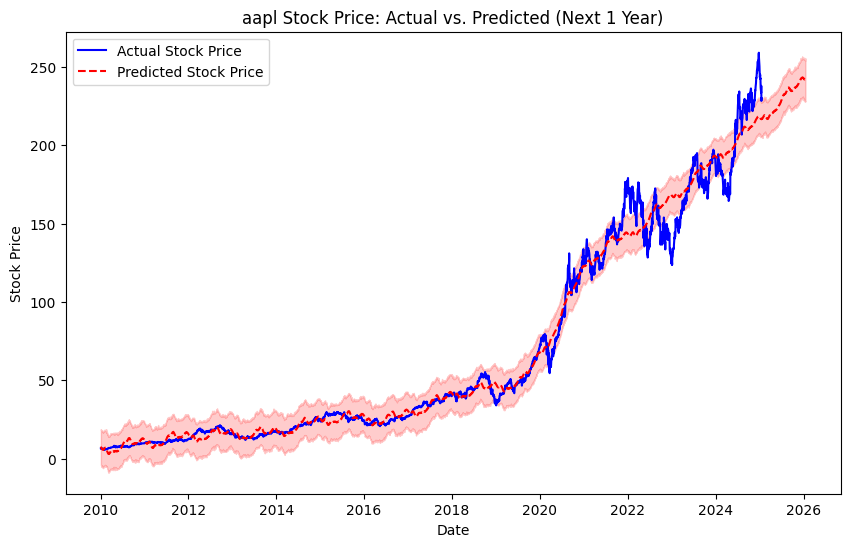

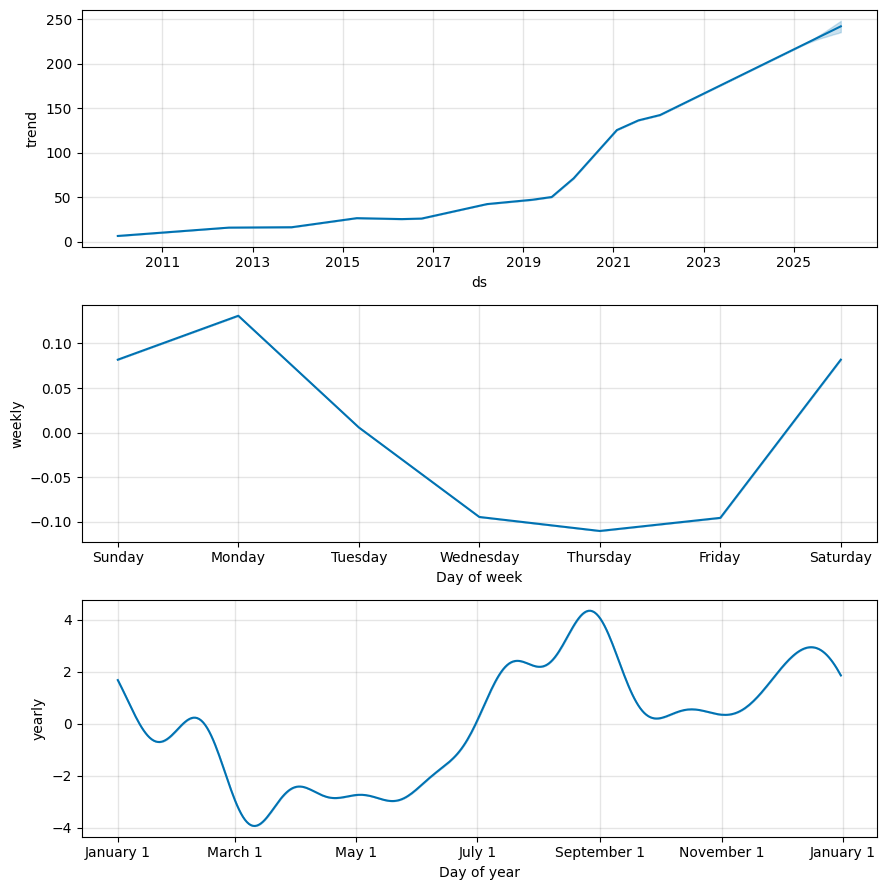


Mean Absolute Error (MAE) for prediction: 29.96
Predicted closing prices for the next 365 days (2025):
           Date  Predicted Close Price
3785 2025-01-18             216.763179
3786 2025-01-19             216.781920
3787 2025-01-20             216.865021
3788 2025-01-21             216.788956
3789 2025-01-22             216.752661
...         ...                    ...
4145 2026-01-13             241.713040
4146 2026-01-14             241.561380
4147 2026-01-15             241.505806
4148 2026-01-16             241.493099
4149 2026-01-17             241.656440

[365 rows x 2 columns]

Predicted stock data (with bounds):
           Date  Predicted Close Price  yhat_lower  yhat_upper
3785 2025-01-18             216.763179  205.267805  228.070907
3786 2025-01-19             216.781920  205.479957  227.683145
3787 2025-01-20             216.865021  206.069159  228.122523
3788 2025-01-21             216.788956  205.530659  227.445356
3789 2025-01-22             216.752661  205.236230  

In [12]:
predict_stock_price()